<a href="https://colab.research.google.com/github/grownsandip/Deep/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This is about traing an ANN model on bank dataset to predict if a customer has probability to leave the bank**

In [ ]:
!pip install tensorflow

In [ ]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


import some basic libraries for data processing


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

reading the dataset from the drive

In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/dataset/Churn_Modelling/Churn_Modelling.csv')

now we shall see the dataset

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Now we will seperate the independent and dependent features

In [ ]:
X=dataset.iloc[:,3:13] #here the columns such as name,custid,rownumber etc are of not much important so we are only considering creditscore to estimated

In [ ]:
Y=dataset.iloc[:,13] # here our 13th cloumn is dependent column

In [ ]:
X.head()
Y.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


**Feature Engineering**

we can see geography and gender are categorical data so we can convert them into one hot encoding or get_dummies for convinience

In [ ]:
geography=pd.get_dummies(X['Geography'],drop_first=True) #we are encoding geography drop_first drops first column
gender=pd.get_dummies(X['Gender'],drop_first=True)

Now we are going to concatinate these two variables in the dataset frame for that purpose we have to drop the "Geography" and "Gender" columns from the original dataframe and than add these variables

In [ ]:
X=X.drop(['Geography','Gender'],axis=1) #dropping prev two columns and updating X

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


now we simply concatenate the data

In [ ]:
X=pd.concat([X,geography,gender],axis=1)

Now we split the data into training data and testing data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

Now we do feature scaling basically required for distance based algo or algo using gradient descent for faster convergence to global minima

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

**Now we make the ANN**

In [ ]:
from tensorflow.keras.models import Sequential #block inside which nuerons reside
from tensorflow.keras.layers import Dense #helps us creating circles neurons
from tensorflow.keras.layers import LeakyReLU,PReLU,ReLU,ELU #activation functions
from tensorflow.keras.layers import Dropout# creates dropout layers to prevent overfitting problem

Lets initialize the ANN

In [ ]:
classifier=Sequential()

Adding the input Layer

In [ ]:
classifier.add(Dense(units=11,activation='relu')) #Dense layer of 11 input features relu will be for nextlayers

adding first hidden layer with 7 neurons and relu activation

In [ ]:
classifier.add(Dense(units=7,activation='relu'))

adding the second hidden layer with 6 neurons

In [ ]:
classifier.add(Dense(units=6,activation='relu'))

Adding the output layer as single neuron as this is binary classification we can use sigmoid activation function

In [ ]:
classifier.add(Dense(units=1,activation='sigmoid'))

**Now our neural network is ready for training**

In [ ]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01) #we are selecting a learning rate of 0.01
#we compile the model with specifications
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

now we fit the model under wrt training and testing dataset

early stopping is when the accuracy metric stops improving the method automatically stops the training process

In [ ]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model_history=classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 6s 5ms/step - loss: 0.4261 - accuracy: 0.8089 - val_loss: 0.3899 - val_accuracy: 0.8364
Epoch 2/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3673 - accuracy: 0.8474 - val_loss: 0.3676 - val_accuracy: 0.8440
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3557 - accuracy: 0.8515 - val_loss: 0.3594 - val_accuracy: 0.8542
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3462 - accuracy: 0.8606 - val_loss: 0.3567 - val_accuracy: 0.8546
Epoch 5/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3491 - accuracy: 0.8548 - val_loss: 0.3574 - val_accuracy: 0.8519
Epoch 6/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3469 - accuracy: 0.8545 - val_loss: 0.3555 - val_accuracy: 0.8588
Epoch 7/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3446 - accuracy: 0.8586 - val_loss: 0.3561 - val_accuracy:

checking the history of what parameters we have focused on

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
model_history.history.values()

dict_values([[0.42612138390541077, 0.3673344552516937, 0.35572847723960876, 0.3462149500846863, 0.34905022382736206, 0.34686335921287537, 0.3446282148361206, 0.33879706263542175, 0.34102100133895874, 0.33931204676628113, 0.33796676993370056, 0.33745092153549194, 0.3318723142147064, 0.3370950520038605, 0.33300158381462097, 0.33443376421928406, 0.33353230357170105, 0.3356923460960388, 0.3329709470272064, 0.33053746819496155, 0.33133453130722046, 0.331367164850235, 0.3283917009830475, 0.3301168382167816, 0.32785648107528687, 0.3284333348274231, 0.3317103981971741, 0.3276752829551697, 0.32732540369033813, 0.3271580934524536, 0.32500332593917847, 0.3280317783355713, 0.3236722946166992, 0.32766690850257874], [0.8089195489883423, 0.8473595976829529, 0.8514648079872131, 0.8606083393096924, 0.854823648929596, 0.8544504642486572, 0.8585556745529175, 0.85780930519104, 0.8563164472579956, 0.858928918838501, 0.8598619103431702, 0.8585556745529175, 0.8619145154953003, 0.8587422966957092, 0.861914515

lets plot the accuracy and validation_accuracy for checking differences

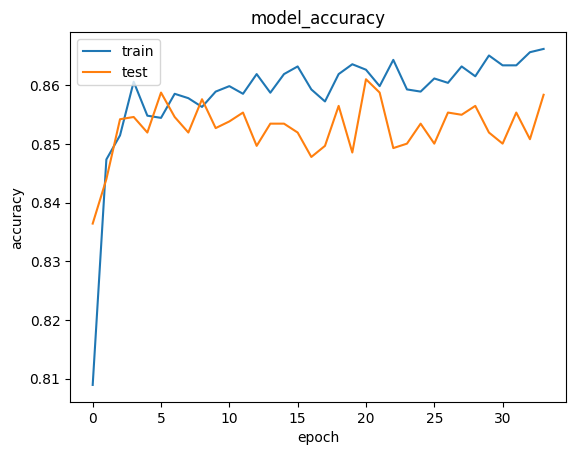

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()


Lets do the prediction using test data


In [ ]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 [==============================] - 0s 2ms/step


create the confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)

calculate the accuracy score

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,Y_test)
score

0.8585

getting the weights

In [ ]:
classifier.get_weights()

[array([[-1.3337933 ,  0.8504988 ,  0.29886305, -0.2217596 ,  1.2482682 ,
         -0.12342483, -0.11140937, -0.45214146, -0.06743328,  0.06356984,
          0.79920936],
        [-1.1400216 , -1.3952172 , -2.5987926 , -2.3753185 , -0.7027124 ,
         -0.7763557 ,  0.7061062 ,  3.6014237 ,  0.8468821 ,  2.623477  ,
         -1.6110388 ],
        [-0.9003045 , -0.21520138, -0.13618319, -0.98867404,  0.9511049 ,
         -0.8410853 , -0.14779383, -0.6207571 ,  0.28078553,  0.00573039,
          0.61157376],
        [ 0.04992808, -1.2708472 , -1.0626066 ,  0.0061068 , -1.4462981 ,
          1.8760788 ,  1.538681  ,  0.1440574 , -2.6516747 ,  0.31550312,
          0.08549131],
        [-0.15634738, -0.371176  ,  0.875025  , -0.46196762,  0.5779883 ,
         -1.5860777 ,  3.587552  , -1.9438094 , -3.1779253 ,  2.112662  ,
         -0.13323879],
        [-1.0565468 ,  1.9631988 , -1.2504269 ,  0.1466769 ,  0.7119333 ,
          0.63374406, -0.18390663, -0.44308627, -0.21707055, -0.0742553

In [ ]:
!git config --global user.name "Sandip"
!git config --global user.email "roysandip33290@gmail.com"


In [ ]:
!git clone https://github.com/grownsandip/Deep.git


Cloning into 'Deep'...


In [ ]:
!mv /content/drive/MyDrive/Colab\ Notebooks/ANN.ipynb /content/Deep/


In [ ]:
! ls /content/drive/MyDrive/Colab\ Notebooks/ANN.ipynb

'/content/drive/MyDrive/Colab Notebooks/ANN.ipynb'


In [ ]:
%cd /content/Deep/

/content/Deep


In [ ]:
! ls


ANN.ipynb


In [ ]:
!git add ANN.ipynb
